<a href="https://colab.research.google.com/github/Theveetha/Mushroom_Classification/blob/main/Mushroom_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MUSHROOM CLASSIFICATION**
## *Edifungi - Safegaurd foragers by Distinguishing poisonous from edible mushroom*

**GOAL:**
1. Do a detailed analysis to identify and visualize which factors contribute to the mushroom classification.
2. Perform model prediction for various models and find the best among them.

**INDEX:**
* [Data Gathering](#Data_Gathering)
* [Data Understanding](#Data_Understanding)
* [Exploratory Data Analysis](#Exploratory_Data_Analysis)
* [Data Preprocessing](#Data_Preprocessing)
* [Data Modeling](#Data_Modeling)
* [Model Evaluation](#Model_Evaluation)

<a name="Data_Gathering"></a>
## **DATA GATHERING**
**GOAL:**
1. Import required libraries for our analysis
2. Connect to the drive and load the dataset
3. Information about the metadata

### **Import Required Libraries**

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Set max columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### **Mount Drive**

In [239]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Import the Dataset**

In [240]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/EdiFungi/EdiFungi_Data.csv')

# Data Dimension
print(f"Dataset provided has {df.shape[0]} rows and {df.shape[1]} columns")

df.head()

Dataset provided has 61069 rows and 21 columns


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


### **Data Description**

Below we have detailed description of each variables provided in the dataset

| Variable Name        | Variable Information | Description                     | Additional Information                                                                 |
|----------------------|----------------------|---------------------------------|-----------------------------------------------------------------------------------------|
| class                | Binary               | Mushroom Classification         | poisonous = p, edible = e                                                               |
| cap-diameter         | Metrical             | Cap Diameter                    | float number in cm                                                                      |
| cap-shape            | Nominal              | Cap Shape                       | bell=b, conical=c, convex=x, flat=f, sunken=s, spherical=p, others=o                    |
| cap-surface          | Nominal              | Cap Surface                     | fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e |
| cap-color            | Nominal              | Cap Color                       | brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k |
| does-bruise-or-bleed | Nominal              | Bruise or Bleed (Yes/No)         | bruises-or-bleeding=t, no=f                                                             |
| gill-attachment      | Nominal              | Gill Attachment                 | adnate=a, adnexed=x, decurrent=d, free=e, sinuate=s, pores=p, none=f, unknown=?         |
| gill-spacing         | Nominal              | Gill Spacing                    | close=c, distant=d, none=f                                                              |
| gill-color           | Nominal              | Gill Color                      | brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f |
| stem-height          | Metrical             | Stem Height                     | float number in cm                                                                      |
| stem-width           | Metrical             | Stem Width                      | float number in mm                                                                      |
| stem-root            | Nominal              | Stem Root                       | bulbous=b, swollen=s, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r                   |
| stem-surface         | Nominal              | Stem Surface                    | fibrous=i, grooves=g, scaly=y, smooth=s, shiny=h, leathery=l, silky=k, sticky=t, wrinkled=w, fleshy=e, none=f |
| stem-color           | Nominal              | Stem Color                      | brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f |
| veil-type            | Nominal              | Veil Type                       | partial=p, universal=u                                                                  |
| veil-color           | Nominal              | Veil Color                      | brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k, none=f |
| has-ring             | Nominal              | Has Ring (Yes/No)               | ring=t, none=f                                                                          |
| ring-type            | Nominal              | Ring Type                       | cobwebby=c, evanescent=e, flaring=r, grooved=g, large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=? |
| spore-print-color    | Nominal              | Spore Print Color               | brown=n, buff=b, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, blue=l, orange=o, black=k |
| habitat              | Nominal              | Habitat                         | grasses=g, leaves=l, meadows=m, paths=p, heaths=h, urban=u, waste=w, woods=d            |
| season               | Nominal              | Season                          | spring=s, summer=u, autumn=a, winter=w                                                  |

<a name="Data_Understanding"></a>
## **DATA UNDERSTANDING**
**GOAL:**
1. Define functions which will come handy in our project
2. Understand the structure of the data
3. Examine the datatypes and perform type casting if required
4. Summarize the data and visualize the frequency distribution (to check skew)

### **Functions**

In [241]:
# Function to extract information on all the columns

def info(data):
  cols = data.columns
  dtype = data.dtypes
  unique_count = [data[col].nunique() for col in cols]
  missing_per = round(data.isnull().mean() * 100,2)
  sample = data.head(2).T
  cat_unique_values = [data[col].unique() if data[col].dtype == 'object' else 'NA' for col in cols]

  data_info = pd.DataFrame({'Column_Name':cols
                            ,'Data_Type':dtype
                            ,'Unique_Value_Count':unique_count
                            ,'Categorical_Unique_Values':cat_unique_values
                            ,'Missing_Percentage':missing_per
                            })
  data_info = pd.concat([data_info,sample],axis=1)
  data_info.rename(columns={0:'Sample_data_1',
                            1:'Sample_data_2'}
                  ,inplace=True)
  data_info.reset_index(drop=True,inplace=True)

  return data_info

In [242]:
# Function to remove the border in graph
def section(sec):
  sec.spines['bottom'].set_visible(True)
  sec.spines['top'].set_visible(False)
  sec.spines['left'].set_visible(False)
  sec.spines['right'].set_visible(False)
  return sec

In [243]:
# Function to remove content for empty subplot
def empty_subplot(sec):
  sec.xaxis.set_visible(False)
  sec.yaxis.set_visible(False)
  for position in ['bottom','top','left','right']:
    sec.spines[position].set_visible(False)

In [244]:
# Function to remove grid lines
def gridlines(sec):
  sec.grid(axis='y',linestyle=':',color='black',alpha=0.3)

### **Detailed Analysis on all the columns**

Check the dimensions

In [245]:
print(f"Number of Rows: {df.shape[0]}\nNumber of Columns: {df.shape[1]}")

Number of Rows: 61069
Number of Columns: 21


Basic information about each column available in the dataset

In [246]:
table_info = info(df)
table_info

,Column_Name,Data_Type,Unique_Value_Count,Categorical_Unique_Values,Missing_Percentage,Sample_data_1,Sample_data_2
0,class,object,2,"[p, e]",0.00,p,p
1,cap-diameter,float64,2571,NA,0.00,15.26,16.6
2,cap-shape,object,7,"[x, f, p, b, c, s, o]",0.00,x,x
3,cap-surface,object,11,"[g, h, nan, t, y, e, s, l, d, w, i, k]",23.12,g,g
4,cap-color,object,12,"[o, e, n, g, r, w, y, p, u, b, l, k]",0.00,o,o
5,does-bruise-or-bleed,object,2,"[f, t]",0.00,f,f
6,gill-attachment,object,7,"[e, nan, a, d, s, x, p, f]",16.18,e,e
7,gill-spacing,object,3,"[nan, c, d, f]",41.04,NaN,NaN
8,gill-color,object,12,"[w, n, p, u, b, g, y, r, e, o, k, f]",0.00,w,w
9,stem-height,float64,2226,NA,0.00,16.95,17.99


Visualization for percentage of missing values

![My Image](https://drive.google.com/uc?id=1KB2XvJEhv0940lTTICBH9pmQvOqp-iid)

Numerical and Categorical columns information

In [247]:
num_cols = table_info[table_info['Data_Type'] != 'object']['Column_Name'].tolist()
cat_cols = table_info[table_info['Data_Type'] == 'object']['Column_Name'].tolist()
print(f'Number of Numerical Columns: {len(num_cols)}')
print(f'Number of Categorical Columns: {len(cat_cols)}')

Number of Numerical Columns: 3
Number of Categorical Columns: 18


Duplicate Rows check

In [248]:
count = df[df.duplicated()].shape
print(f"There are no duplicates in the dataset" if count[0]==0 else f"There are {count[0]} duplicates in the dataset")

There are 146 duplicates in the dataset


Five point Summary

In [249]:
df[num_cols].describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


Frequency Distribution in Numerical columns

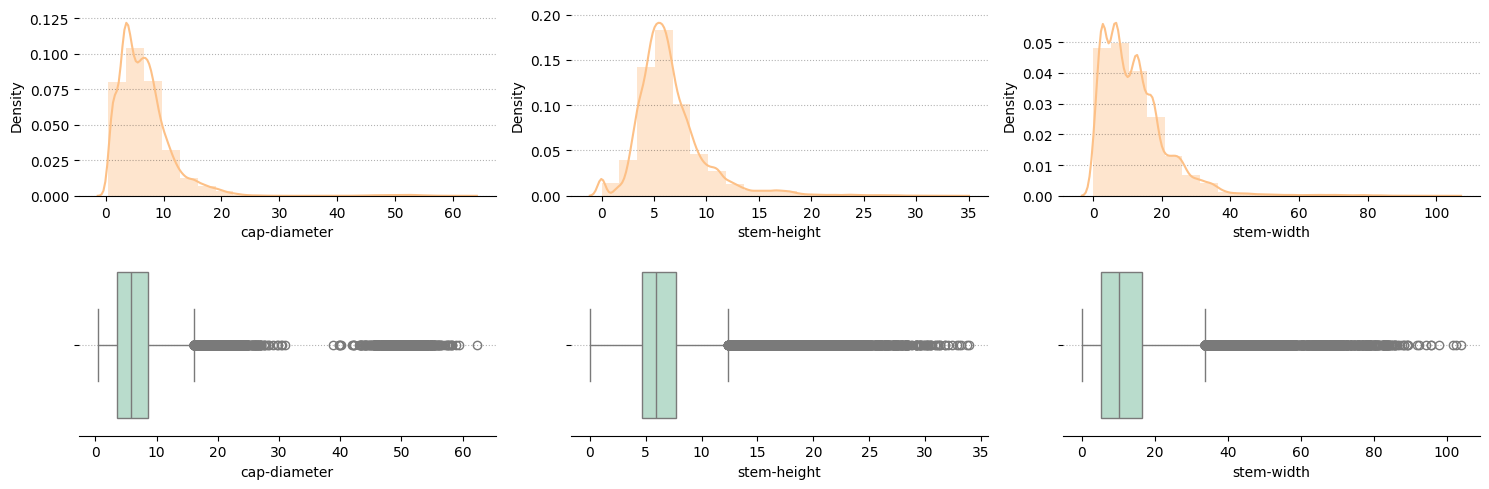

In [250]:
# For understanding the distribution among Numerical variables we will create bins
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,5))
axes = axes.flatten()

for i,cols in enumerate(num_cols):
  sns.distplot(ax=axes[i],x=df[cols],bins=20,color='#FDC086')
  section(axes[i])
  gridlines(axes[i])
  axes[i].set_xlabel(cols)

for i,cols in enumerate(num_cols):
  sns.boxplot(ax=axes[i+3],data=df,x=cols,color='#B3E2CD')
  section(axes[i+3])
  gridlines(axes[i+3])
  axes[i+3].set_xlabel(cols)

plt.tight_layout()
plt.show()

We can see that the outliers are akmost equally distributed between each class

In [251]:
# Getting the value counts for each condition
cap_diameter_count = df[df['cap-diameter'] >= 15]['class'].value_counts()
stem_height_count = df[df['stem-height'] >= 13]['class'].value_counts()
stem_width_count = df[df['stem-width'] >= 30]['class'].value_counts()

# Combining these series into a DataFrame
outliers = pd.DataFrame({
    'cap_diameter_count': cap_diameter_count,
    'stem_height_count': stem_height_count,
    'stem_width_count': stem_width_count
})

outliers

,cap_diameter_count,stem_height_count,stem_width_count
class,,,
e,1902,1503,1465
p,1243,1189,1603


### **OBSERVATION**
1. Typecasting is not required as each column is mapped to its corresponding datatype
2. There are no missing values in the binary or numerical columns
3. Columns having missing values are cap-surface, gill-attachment, gill-spacing, stem-root, stem-surface, veil-type, veil-color, ring-type, spore-print-color. Among these 9 columns 5 columns have more than 60% of missing data which needs to be handled in future
4. There are 3 numerical columns and 18 categorical columns
5. We can see that there are 146 duplicates in the dataset which needs to be removed later
6. The boxplot reveals that this is a skewed dataset with many outliers. This needs to be handled via normal distriibution while model building
7. From description we can see that cap-diameter and stem-height are in centimeters(cm) whereas stem-width are in millimeters(mm). For consistency we need to conver millimeters to centimeters

<a name="Exploratory_Data_Analysis"></a>
## **EXPLORATORY DATA ANALYSIS**
**GOAL:**
1. Do fundamental data cleaning and data transformation for handling missing data, remove duplicates and outliers treatment if required
2. Visualize the Data by univariate analysis and bivariate analysis for all the variables with respect to the target variable (Class)
3. Analyse the target variable to see if its balanced or not
4. Check on how individual variables play a role to affect the classification of the mushroom

### **Data Cleaning and Transformation**

For analysis purpose we are copying the dataset to do modification on it, so the original data remains intact

In [252]:
# Creating a copy
df_copy = df.copy()
df_copy.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


Handling missing value
- Delete the columns which is having more than 40% missing value as they don't contribute much in model building
- For categorical columns having less than 40% replace the null value with mode

In [253]:
# Remove columns
rem_cols = table_info[table_info['Missing_Percentage'] >= 40]['Column_Name'].to_list()
df_copy.drop(columns=rem_cols,inplace=True)
print("Columns to remove:")
for i,col in enumerate(rem_cols):
  print(f"{i+1}. {col}")
print("******"*10)
print(f"Number of Columns: {df_copy.shape[0]}\nNumber of Rows: {df_copy.shape[1]}")

Columns to remove:
1. gill-spacing
2. stem-root
3. stem-surface
4. veil-type
5. veil-color
6. spore-print-color
************************************************************
Number of Columns: 61069
Number of Rows: 15


In [254]:
# Handle missing data
print("Columns to handle null values:")
null_cols = table_info[(table_info['Missing_Percentage'] > 0) & (table_info['Missing_Percentage'] < 40) & (table_info['Data_Type'] == 'object')]['Column_Name'].to_list()
for i,col in enumerate(null_cols):
  print(f"{i+1}. {col}")

for col in null_cols:
  df_copy[col].fillna(df_copy[col].mode()[0],inplace=True)

Columns to handle null values:
1. cap-surface
2. gill-attachment
3. ring-type


In [255]:
# Remove Duplicate
df_copy.drop_duplicates(inplace=True)
print(f"Number of Rows: {df_copy.shape[0]}\nNumber of Columns: {df_copy.shape[1]}")

Number of Rows: 60923
Number of Columns: 15


Linear models (Logistic Regression) and distance-based models (KNN and SVM) are sensitive to outliers. In these cases, outliers can disproportionately affect the model, leading to poor predictions. In such cases we have to treat outliers in case if required for fine tunning

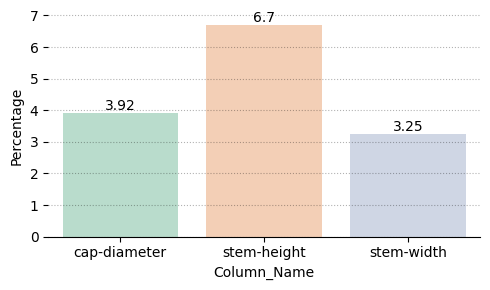

In [256]:
# Calulate 25th (Q1) and 75th (Q3) percentile
Q1 = df_copy[num_cols].quantile(0.25)
Q3 = df_copy[num_cols].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define upper and lower boundaries
upper_boundary = Q3 + (1.5 * IQR)
lower_boundary = Q1 - (1.5 * IQR)

# Identify outliers for each column
outliers = pd.DataFrame(df_copy[num_cols].apply(lambda x: (x < lower_boundary[x.name]) | (x > upper_boundary[x.name])))

# Calculate the percentage of outliers for each column
outlier_percentage = pd.DataFrame(round((outliers.sum() / df_copy[num_cols].shape[0]) * 100,2))
outlier_percentage.rename(columns={0:'Percentage'},inplace=True)

# Visualisation for outliers
plt.figure(figsize=(5,3))
barplot = sns.barplot(data=outlier_percentage,x=outlier_percentage.index,y='Percentage',palette='Pastel2')
plt.xlabel("Column_Name")
for i in range(0,3):
  barplot.bar_label(barplot.containers[i])
section(barplot)
gridlines(barplot)
plt.tight_layout()
plt.show()

Here we can see that the outliers percentage is less than 7% it will not significantly impact our analysis or business decision making. Hence we are not treating the outliers and while model building for fine tuning purpose if required we can treat them

In [257]:
table_info = info(df_copy)
num_cols = table_info[table_info['Data_Type'] != 'object']['Column_Name'].tolist()
cat_cols = table_info[table_info['Data_Type'] == 'object']['Column_Name'].tolist()
print(f'Number of Numerical Columns: {len(num_cols)}')
print(f'Number of Categorical Columns: {len(cat_cols)}')
table_info

Number of Numerical Columns: 3
Number of Categorical Columns: 12


,Column_Name,Data_Type,Unique_Value_Count,Categorical_Unique_Values,Missing_Percentage,Sample_data_1,Sample_data_2
0,class,object,2,"[p, e]",0.0,p,p
1,cap-diameter,float64,2571,NA,0.0,15.26,16.6
2,cap-shape,object,7,"[x, f, p, b, c, s, o]",0.0,x,x
3,cap-surface,object,11,"[g, h, t, y, e, s, l, d, w, i, k]",0.0,g,g
4,cap-color,object,12,"[o, e, n, g, r, w, y, p, u, b, l, k]",0.0,o,o
5,does-bruise-or-bleed,object,2,"[f, t]",0.0,f,f
6,gill-attachment,object,7,"[e, a, d, s, x, p, f]",0.0,e,e
7,gill-color,object,12,"[w, n, p, u, b, g, y, r, e, o, k, f]",0.0,w,w
8,stem-height,float64,2226,NA,0.0,16.95,17.99
9,stem-width,float64,4630,NA,0.0,17.09,18.19


### **Visualize of all Variables**

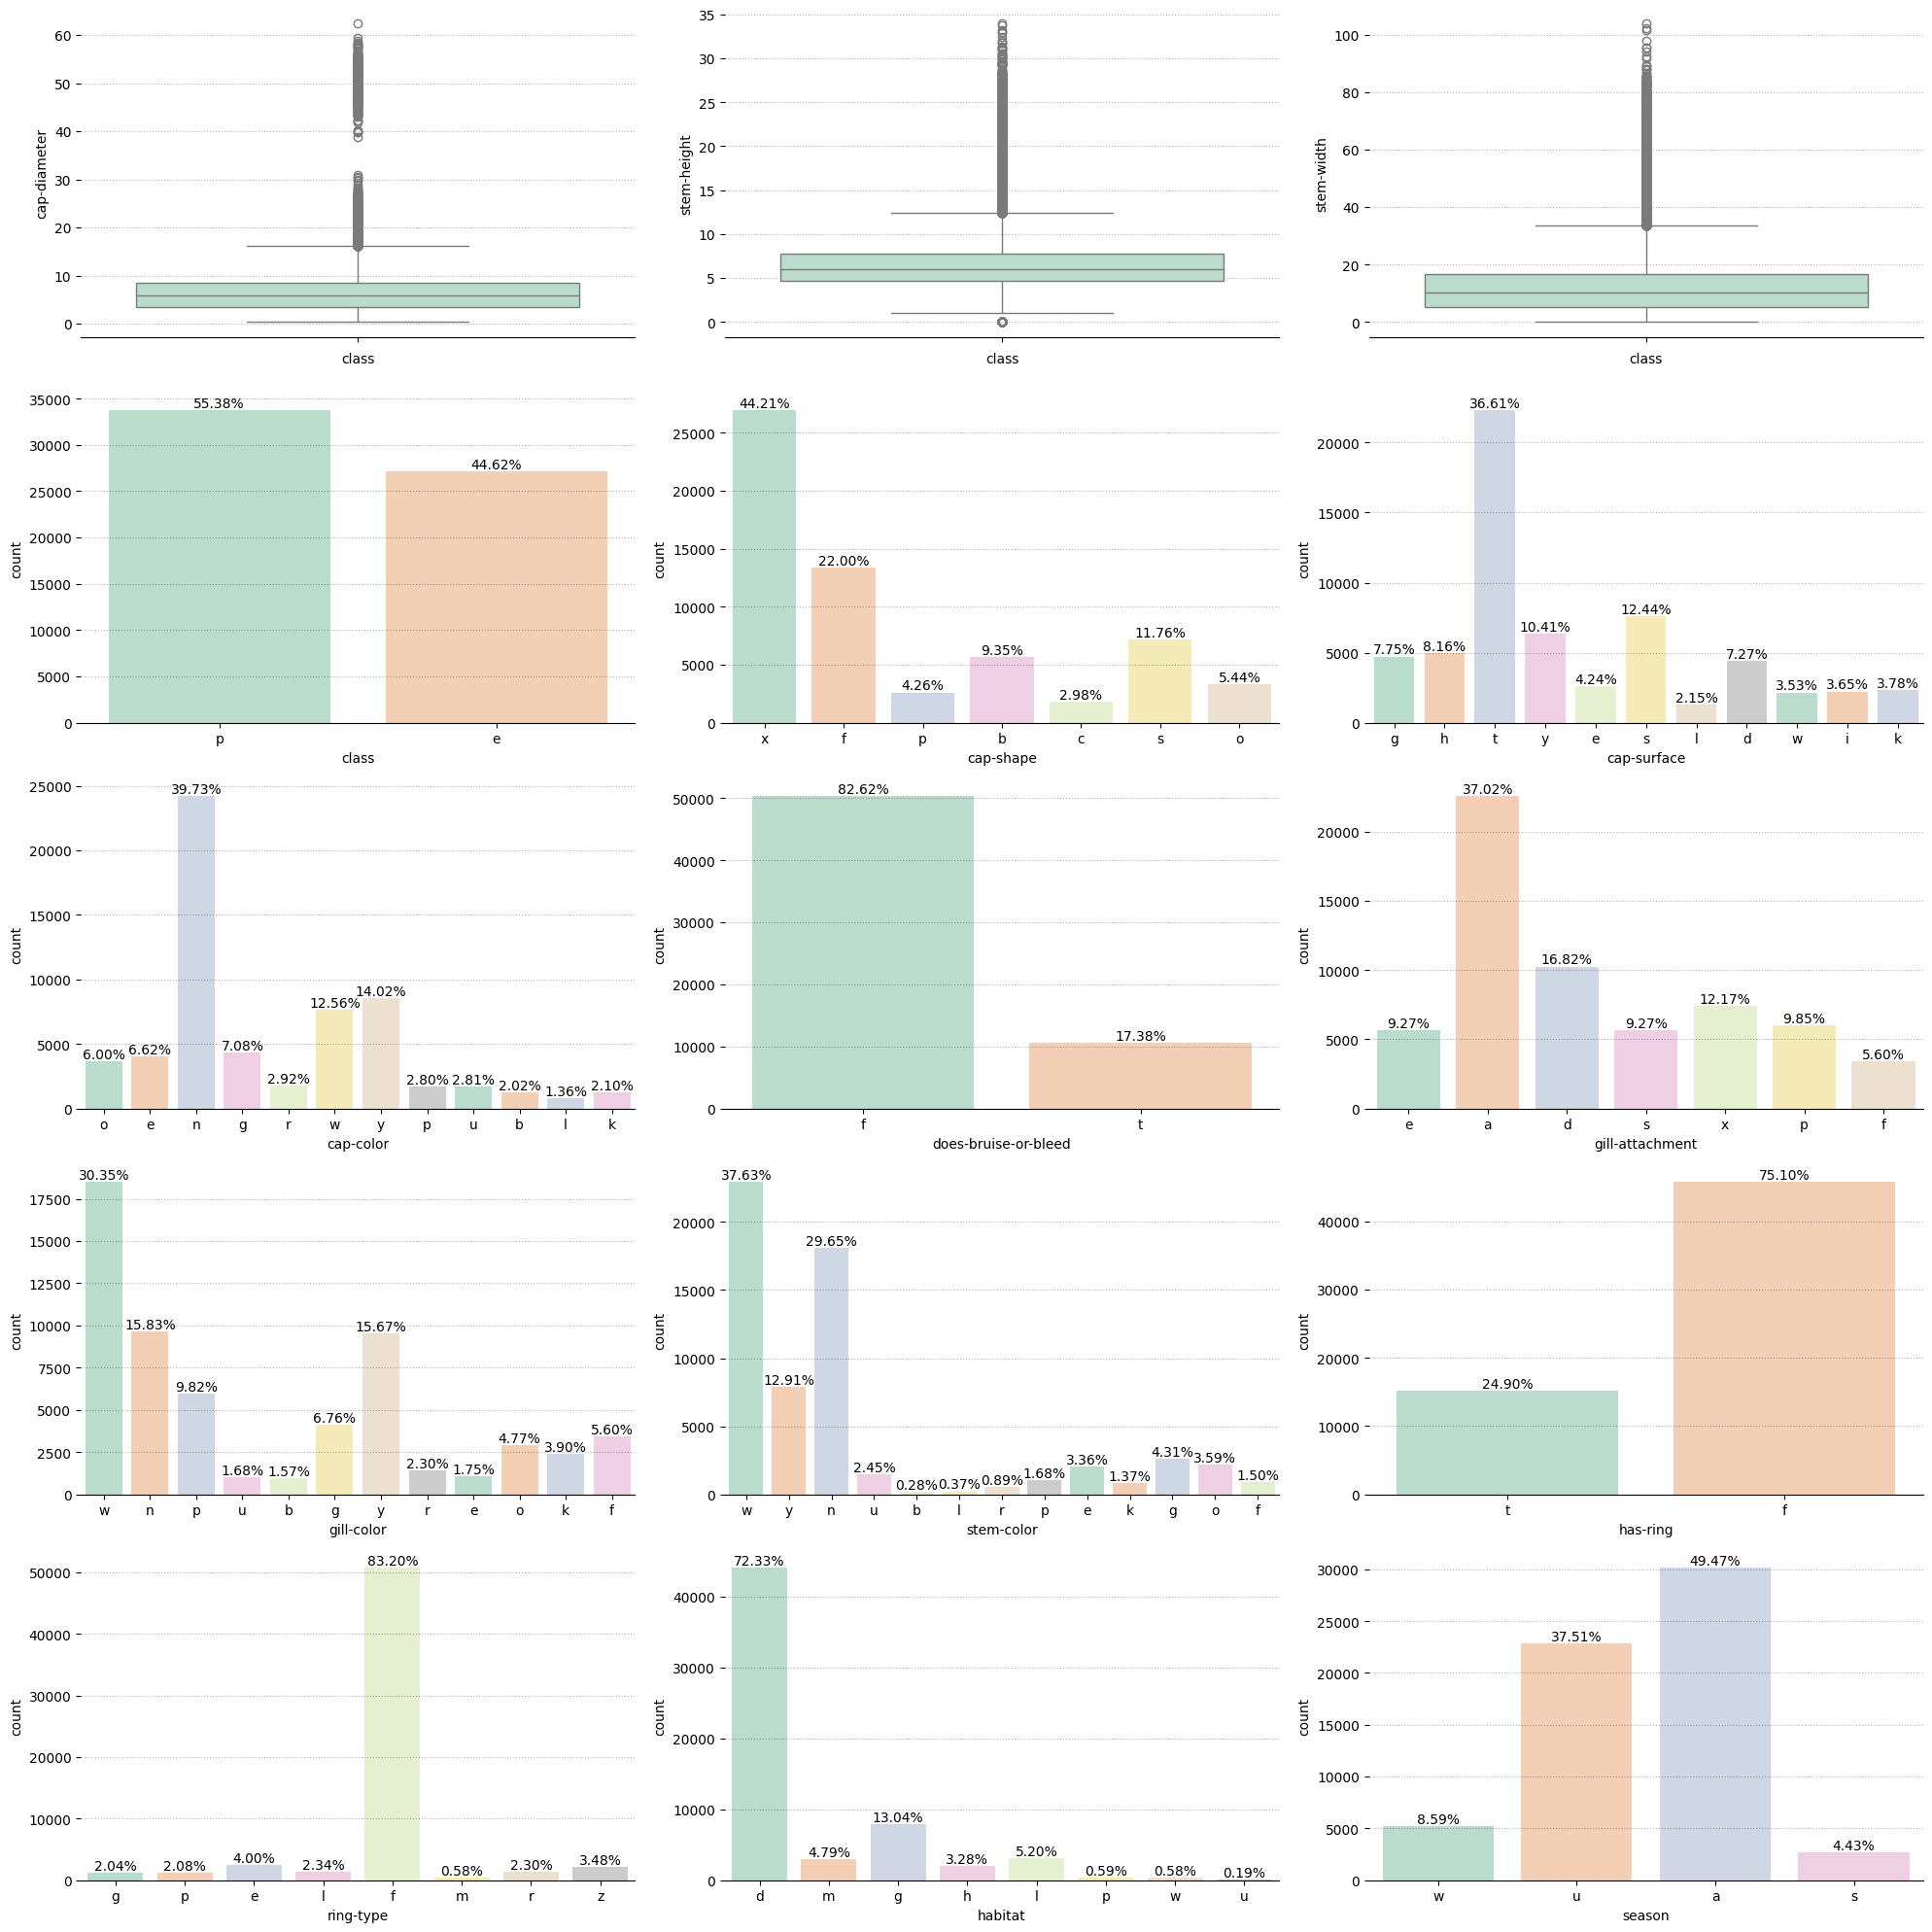

In [323]:
# Univariate Analysis
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()

# Boxplots for numerical columns
for i, cols in enumerate(num_cols):
    sns.boxplot(ax=axes[i], data=df_copy, y=cols, palette='Pastel2')
    section(axes[i])
    gridlines(axes[i])
    axes[i].set_xlabel('class')
    axes[i].set_ylabel(cols)

# Countplots for categorical columns
for i, cols in enumerate(cat_cols):
    sns.countplot(ax=axes[i+3], data=df_copy, x=cols, palette='Pastel2')
    section(axes[i+3])
    gridlines(axes[i+3])
    axes[i+3].set_xlabel(cols)

    total_count = len(df_copy[cols])

    for container in axes[i+3].containers:
        for bar in container:
            height = bar.get_height()
            percentage = (height / total_count) * 100
            axes[i+3].text(
                bar.get_x() + bar.get_width() / 2,
                height,
                f'{percentage:.2f}%',
                ha='center',
                va='bottom'
            )

plt.tight_layout()
plt.show()


### **OBSERVATION:**
Below is the table which represents the percentage of most frequent categorical for all categorical variables

| Variable Name            | Most Common Category   | Percentage |
|-------------------------|-----------------------|------------|
| class                   | p - poisonous         | 55.38      |
| cap-shape               | x - convex            | 44.21      |
| cap-surface             | t - sticky            | 36.61      |
| cap-color               | n - brown             | 39.73      |
| does-bruise-or-bleed   | f - false             | 82.62      |
| gill-attachment         | a - adnate            | 37.02      |
| gill-color              | w - white             | 30.35      |
| stem-color              | w - white             | 37.63      |
| has-ring                | f - false             | 75.1       |
| ring-type               | f - none              | 83.2       |
| habitat                 | d - woods             | 72.33      |
| season                  | a - autumn            | 49.47      |


<a name="Data_Preprocessing"></a>
## **DATA PREPROCESSING**

**GOAL:**

1. Prepare the data to use for training the model by spliting the data into Independant and Dependant variables
2. Perform feature selection
3. Handling imbalance data if required
4. Convert all the categorical columns to numerical columns via Encoding
5. Perform Standardization for numerical columns incase required
6. Correlation Analysis

<a name="Data_Modeling"></a>
## **DATA MODELING**
**GOAL:**
1. Split the data into Training and Testing sets
2. Choose the Type of model and select the algorithms based on that
  * Decision Tree
  * Random Forest
  * K Nearest Neighbour
  * Naive Bayes
  * Logistic Regression
  * Support Vector Machine
  * XG-Boost

<a name="Model_Evaluation"></a>
## **MODEL EVALUATION**
**GOAL:**
1. Compare confusin matrix for all the above created algorithm's
2. Plot ROC Curve with AUC score
3. Analyze and find which algorithm provides us the most promising model for our classification problem